# PA 1: Exploratory Analysis over Federal Emergencies and Disasters

## Student Details

Student Name and ID: Satish Rella (1001677995)

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!
Do not make any changes in the dataset file and do not rename the 'database.csv'.
Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>.
Do not to forget to cite any external sources used by you.
[2.5 points]


## Assignment Details

In this assignment, you will conduct a guided exploration over the Federal Emergencies and Disasters dataset. You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Pandas.

You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

## Dataset Details

In this assignment, you will work on 63 years of Federal Disasters dataset. Specifically, you will work on database.csv file from kaggle repository (https://www.kaggle.com/fema/federal-disasters). The file database.csv contains 46,184 rows and 14 columns. This dataset begins with the year 1953, and runs up to the year 2017. Each row corresponds to an emergency declared by the president due to a natural disaster all around the US. The columns of the data-set are:
- Declaration Number - Unique number for each emergency declared
- Declaration Type - Type of declaration
- Declaration Date - Date of declaration
- State - State affected
- County - County affected
- Disaster Type 
- Disaster Title
- Start Date - The date event started
- End Date - The date event ended
- Close Date - End of Declaration
- Individual Assistance Program - Whether IAP was provided or not?
- Individuals & Households Program - Whether IHP was provided or not?
- Public Assistance Program - Whether PAP was provided or not?
- Hazard Mitigation Program - Whether HMP was provided or not?


## Required Python Packages
You will use the packages imported below in this assignment. 
Do NOT import any new packages without confirming with the TA. 

In [4]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset
The Python code below reads the Federal Emergencies and Disasters dataset into a Pandas data frame with the name df_data. 
For this code to work, the file 'database.csv' must be in the same folder as this file.

In [5]:
#read the csv file into a Pandas data frame
df_data = pd.read_csv('database.csv', encoding='latin1')

#https://stackoverflow.com/questions/41476150/removing-space-from-dataframe-columns-in-pandas/41476181
df_data.columns = df_data.columns.str.replace(' ', '_')

#return the first 5 rows of the dataset
df_data.head()

Declaration_Number Declaration_Type Declaration_Date State County  \
0               DR-1         Disaster       05/02/1953    GA    NaN   
1               DR-2         Disaster       05/15/1953    TX    NaN   
2               DR-3         Disaster       05/29/1953    LA    NaN   
3               DR-4         Disaster       06/02/1953    MI    NaN   
4               DR-5         Disaster       06/06/1953    MT    NaN   

  Disaster_Type              Disaster_Title  Start_Date    End_Date  \
0       Tornado                     Tornado  05/02/1953  05/02/1953   
1       Tornado  Tornado and Heavy Rainfall  05/15/1953  05/15/1953   
2         Flood                       Flood  05/29/1953  05/29/1953   
3       Tornado                     Tornado  06/02/1953  06/02/1953   
4         Flood                      Floods  06/06/1953  06/06/1953   

   Close_Date Individual_Assistance_Program Individuals_&_Households_Program  \
0  06/01/1954                           Yes                               No   
1  01/01/1958                           Yes                               No   
2  02/01/1960                           Yes                               No   
3  02/01/1956                           Yes                               No   
4  12/01/1955                           Yes                               No   

  Public_Assistance_Program Hazard_Mitigation_Program  
0                       Yes                       Yes  
1                       Yes                       Yes  
2                       Yes                       Yes  
3                       Yes                       Yes  
4                       Yes                       Yes

# Task 1: Statistical Exploratory Data Analysis
Let us start with getting to know the dataset. Your first task will be to get some basic information by using Pandas features.

In [6]:
#For each task below, look for a Pandas function to do the task.
#Replace None in each task with your code.

# 2.5 points
#Task 1-a: Print the details of the df_data data frame (information such as number of rows,columns, name of columns, etc)
print (">>Task 1-a: Details of df_data data frame are: \n") 
print(df_data.info())

# 2.5 points
#Task 1-b: Find the number of rows and columns in the df_data data frame.
num_rows = len(df_data.index)
num_cols = len(df_data.columns)
print ("\n\n>>Task 1-b: Number of rows:%s and number of columns:%s" % (num_rows, num_cols)) 

# 2.5 points
#Task 1-c: Print the descriptive detail (count, unique, top, freq etc) for 'Start Date' column of the df_data 

print ("\n\n>>Task 1-c: Descriptive details of 'Start Date' column are\n", df_data['Start_Date'].describe())

# 10 points
#Task 1-d: Print ALL the unique values of Disaster Title and Counties  .
disaster_title_list  = df_data['Disaster_Title'].unique()
unique_county_list = df_data['County'].unique()

print ("\n\n >>Task 1-d:")
print(disaster_title_list)
print("#####################################################")
print(unique_county_list) 



>>Task 1-a: Details of df_data data frame are: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46185 entries, 0 to 46184
Data columns (total 14 columns):
Declaration_Number                  46185 non-null object
Declaration_Type                    46185 non-null object
Declaration_Date                    46185 non-null object
State                               46185 non-null object
County                              45988 non-null object
Disaster_Type                       46185 non-null object
Disaster_Title                      46185 non-null object
Start_Date                          46185 non-null object
End_Date                            45843 non-null object
Close_Date                          35210 non-null object
Individual_Assistance_Program       46185 non-null object
Individuals_&_Households_Program    46185 non-null object
Public_Assistance_Program           46185 non-null object
Hazard_Mitigation_Program           46185 non-null object
dtypes: object(14)
memory usag

# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [7]:
# 8 points
#Task 2-a: Find out the declaration titles of type 'Emergency' which lasted more than 120 days
#https://data36.com/pandas-tutorial-2-aggregation-and-grouping/
#https://stackoverflow.com/questions/22132525/add-column-with-number-of-days-between-dates-in-dataframe-pandas
df_data[['Start_Date','End_Date']] = df_data[['Start_Date','End_Date']].apply(pd.to_datetime) #if conversion required
df_data['Days'] = (df_data['Start_Date'] - df_data['End_Date']).dt.days
#df_data['Days'] = pd.to_datetime(df_data['Start_Date']) - pd.to_datetime(df_data['End_Date'])
df_data['Days'] = df_data['Days'].abs()
#print(df_data[df_data['Days']> 120.0])
Emergency_greater_120 = df_data[(df_data['Declaration_Type'] == 'Emergency')&(df_data['Days']>120.0)].Disaster_Title.unique()
print (">>Task 2-a: The declaration titles of type 'Emergency' which lasted more than 120 days are %s" 
       % (Emergency_greater_120))

# 8 points
#Task 2-b: Find out the total number of declarations between 1998 and 1999 where Individual Assistance Program was provided for the state of Texas.
#
df_data[['Declaration_Date']] = df_data[['Declaration_Date']].apply(pd.to_datetime)
df_data['Year'] = df_data['Declaration_Date'].dt.year
num_declarations_1998_1999 = df_data[(df_data['Year']>= 1998) & (df_data['Year']<=1999)& (df_data['Individual_Assistance_Program'] == 'Yes') &(df_data['State'] == 'TX')].Declaration_Type.count()

print ("\n\n>>Task 2-b: The total number of declarations in 1998-1999 for the state of Texas were %s" 
       % (num_declarations_1998_1999))

# 14 points
#Task 2-c: Find out the top 10 counties with the declaration type 'Disaster' and 'Emergency' for all years.
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
n = 10
top10_disasters=df_data[(df_data['Declaration_Type'] == 'Disaster')].groupby(['Year']).County.head(10)
top10_emergencies=df_data[(df_data['Declaration_Type'] == 'Emergency')].groupby(['Year']).County.head(10)
print ("\n\n>>Task 2-c: top 10 counties with the most disasters for all years are: \n%s" % (top10_disasters))
print ("\n\n>>Task 2-c: top 10 counties with the most emergencies for all years are: \n%s" % (top10_emergencies))




>>Task 2-a: The declaration titles of type 'Emergency' which lasted more than 120 days are ['Extreme  Fire Hazard' 'Fire' 'Extreme Fire Hazards' 'West Nile Virus'
 'Drought' 'Wildfires']


>>Task 2-b: The total number of declarations in 1998-1999 for the state of Texas were 322


>>Task 2-c: top 10 counties with the most disasters for all years are: 
0                              NaN
1                              NaN
2                              NaN
3                              NaN
4                              NaN
5                              NaN
6                              NaN
7                              NaN
8                              NaN
9                              NaN
13                             NaN
14                             NaN
15                             NaN
16                             NaN
17                             NaN
18                             NaN
19                             NaN
20                             NaN
21               

# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib may look unaesthetic and so you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like. We have assigned 10 points for the aesthetics of your visualizations.

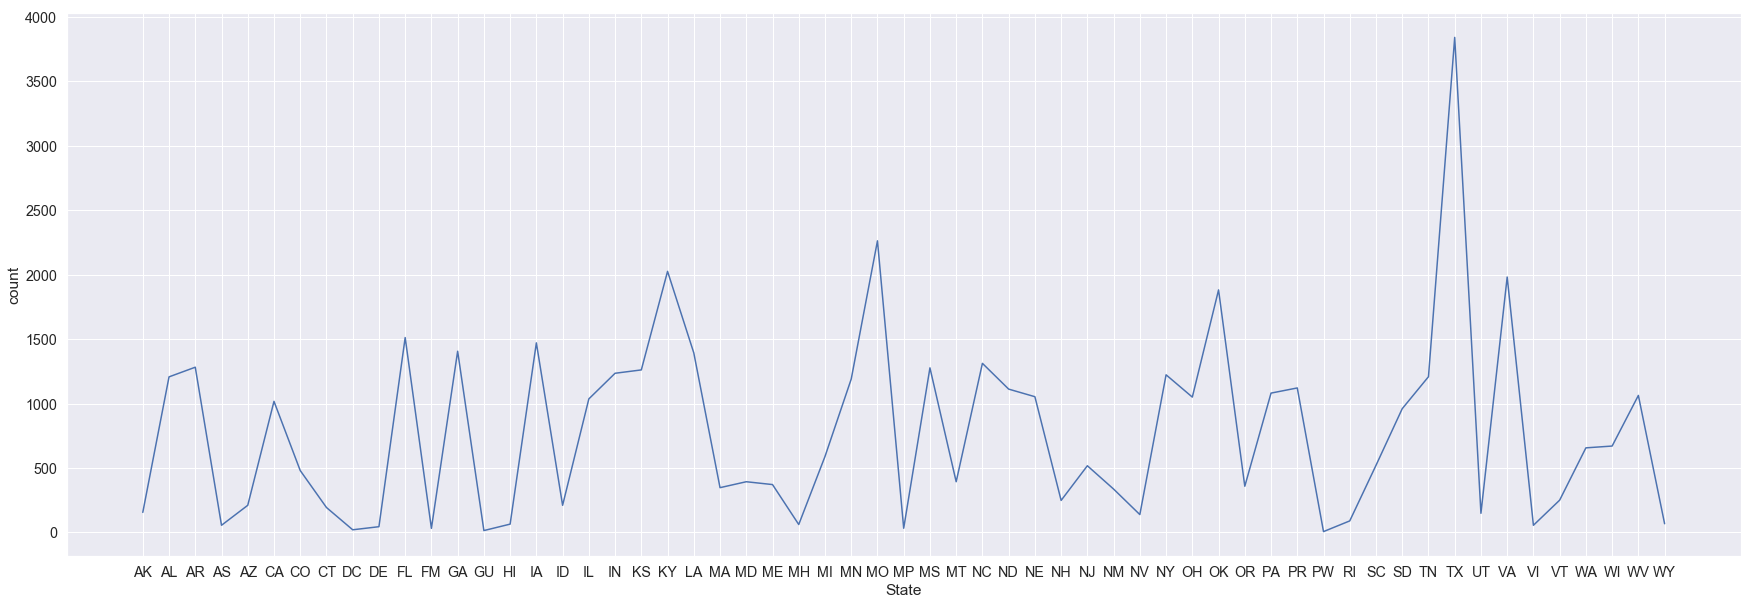

In [8]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)


# 10 points
# Task 3-a: Plot the declaration count for each state . 
# Think of a way to nicely visualize all the states! 
#########################begin code for Task 3-a
New_data = df_data.groupby(['State']).Declaration_Type.count().reset_index(name="count")
#sns.jointplot(x=New_data['State'], y=New_data['count']);
#http://seaborn.pydata.org/generated/seaborn.lineplot.html?highlight=s
#https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
#https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
plt.figure(figsize=(30,10))
sns.lineplot(x="State", y="count", data=New_data)
#New_data.head()
#New_data = sns.load_dataset('New_data')
#with sns.axes_style('white'):
#    g = sns.factorplot("State", data=New_data, aspect=2,
#                       kind="count", color='steelblue')
#    g.set_xticklabels(step=5)
#New_data = sns.load_dataset("New_data")
#sns.swarmplot(x="State", y="count", data='New_data')
#plt.show()


#########################end code for Task 3-a

Disaster     33630
Emergency    11520
Fire          1035
Name: Declaration_Type, dtype: int64


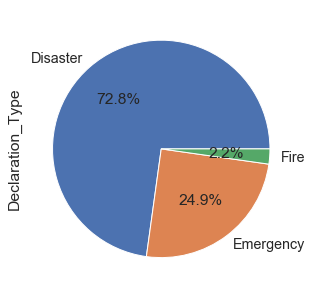

In [9]:
# 20 points
# Task 3-b: Draw a pie chart that represents Declaration type.
#########################begin code for Task 3-b 
#https://chrisalbon.com/python/data_visualization/matplotlib_pie_chart/
pie_count = df_data['Declaration_Type'].value_counts()
print(pie_count)
plot = pie_count.plot.pie(y='Declaration_Type', autopct='%1.1f%%', figsize=(5, 5))

#########################end code for Task 3-b

# Task 4: 
Find out an 'interesting' information from the dataset. Create a visualization for it and explain in a few lines your reasoning. 

This task is worth 20 points. Your result will be judged based on the uniqueness and quality of your work (having a meaningful result and an aesthetic visualization). 

Storm              16250
Flood               9317
Hurricane           8764
Snow                3565
Fire                2647
Ice                 1970
Tornado             1412
Drought             1292
Winter               301
Other                297
Typhoon              119
Earthquake           105
Volcano               50
Water                 42
Chemical              18
Mud/Landslide         10
Tsunami                9
Dam/Levee Break        6
Human Cause            6
Terrorism              5
Name: Disaster_Type, dtype: int64


Text(0, 0.5, 'Total Number of Storm occurance Days')

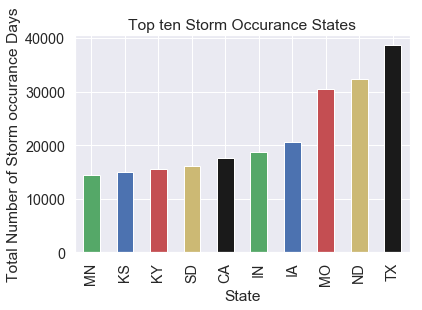

In [33]:
#########################begin code for Task 4
#https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/
New_Info= df_data['Disaster_Type'].value_counts()
print(New_Info)
#Comments :
#From the above data we know that "Storm" occurs more number of times in all years in different States.
#Now we are going to plot the data "top ten states" that storm occurred and how many days it occurs.
#filtering the dataset of column "disaster_type" with Storm
plot_data = df_data[df_data['Disaster_Type']=='Storm']
#Group the Data by State and sum the values of days that occurs in different years
plot_data = plot_data.groupby('State')['Days'].sum()
#Sort the values in asecending order and plot the top ten states that occured "storm" for more number of days.
plot_data.sort_values()[-10:].plot(kind ='bar',color=tuple(["g", "b","r","y","k"]))
plt.title("Top ten Storm Occurance States")
plt.ylabel("Total Number of Storm occurance Days")
#Conclusion:
#From the below graph we can say that "Texas" is the state that occured "storm" for more number of days in the span of "63" years

#########################end code for Task 4